In [2]:
import pandas as pd
import numpy as np
import os

In [252]:
df = pd.read_csv('taxi_peru.csv', sep=';')

В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'
где y – число строк, а x – число колонок.

In [253]:
print(f'df has {df.shape[0]} строк и {df.shape[1]} колонок')

df has 23111 строк и 19 колонок


Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения

In [254]:
na_number = df.isna().sum().count()

Сохраните в переменную df_types типы данных каждой колонки датафрэйма df

In [255]:
df_types = df.dtypes

Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
- numbers = [1, -2, 3, 0, -3, 2]
- Тогда positive_numbers должен быть: positive_numbers = [1, 3]

In [256]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i > 0:
       positive_numbers.append(i)
    elif i == 0:
        break

Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type)

In [257]:
taxi = pd.read_csv('taxi_peru.csv', sep=';')

In [258]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])

In [259]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [260]:
taxi_type = taxi.query('start_type == "asap" or start_type == "reserved"')

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [261]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

In [262]:
taxi_type.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [263]:
taxi[(taxi['start_type']=='reserved') & (taxi['wait_time'] > 0)] \
    .groupby('driver_id') \
    .agg({'user_id':'count'}) \
    .rename(columns = {'user_id':'late_number'}) \
    .idxmax()

late_number    406921adcca37705ef527b4246c0cfea
dtype: object

In [264]:
taxi[(taxi['start_type']=='reserved') & (taxi['wait_time'] > 0)] \
    .driver_id \
    .value_counts() \
    .idxmax()

'406921adcca37705ef527b4246c0cfea'

Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [265]:
taxi['month'] = taxi.start_at.dt.month

In [266]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

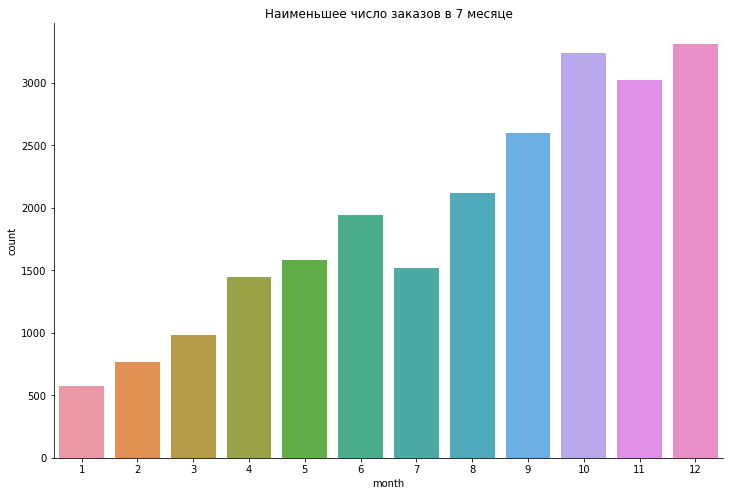

In [268]:
plt.figure(figsize=(12, 8))
plt.title(f'Наименьшее число заказов в {taxi.query("6 <= month <= 8").month.value_counts().idxmin()} месяце')
sns.countplot(taxi.month)
sns.despine()
plt.show()

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

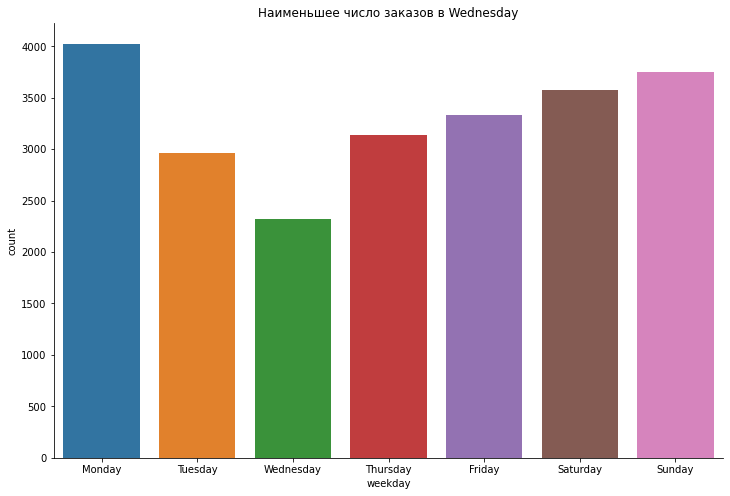

In [269]:
plt.figure(figsize=(12, 8))
plt.title(f'Наименьшее число заказов в {taxi.weekday.value_counts().idxmin()}')
sns.countplot(taxi.weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.despine()
plt.show()

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
- DAU (daily active users) – число уникальных пользователей за день
- WAU (weekly active users) – число уникальных пользователей за неделю
- MAU (monthly active users) – число уникальных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU.

In [270]:
mau = taxi.groupby('month')\
    .agg({'user_id':lambda x: x.nunique()})

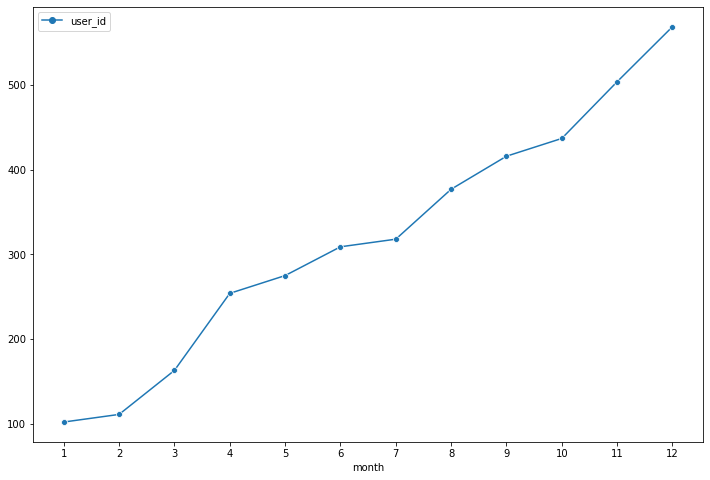

In [271]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=mau, markers='o-')
plt.xticks(range(1, 13));